In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.9 MB/s 
time: 519 µs (started: 2022-10-19 03:59:08 +00:00)


In [ ]:
# Data : Images
# 1. Download manually the images from Google
# 2. DOwnload dataset from Kaggle.com
# 3. Build a Image Web Crawler
# 4. Use Python libraries to scrape the images (Using)

time: 620 µs (started: 2022-10-17 16:37:59 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 34.7 s (started: 2022-10-19 03:59:16 +00:00)


In [ ]:
import numpy as np

a = np.array([[1,2,3,4,5],
              [4,5,6,7,8]])
a.ndim

2

time: 7.32 ms (started: 2022-10-19 04:00:20 +00:00)


In [ ]:
# How do i convert Matrix to Vector? - flatten()
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 14.1 ms (started: 2022-10-19 04:00:25 +00:00)


In [ ]:
# Preprocessing
# 1. Resize
# 2. Flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/tree images'
CATEGORIES = ['Acacia','Agave','Areca palm','Mahogany','Palas','cocnut tree','mango tree','neem','papaya','sagwan']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 8min 11s (started: 2022-10-19 04:00:30 +00:00)


In [ ]:
len(flat_data[0])

67500

time: 4.64 ms (started: 2022-10-19 04:11:48 +00:00)


In [ ]:
150*150*3

67500

time: 8.8 ms (started: 2022-10-19 04:11:52 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9,
       9, 9, 9])

time: 4.16 ms (started: 2022-10-19 04:11:55 +00:00)


<BarContainer object of 10 artists>

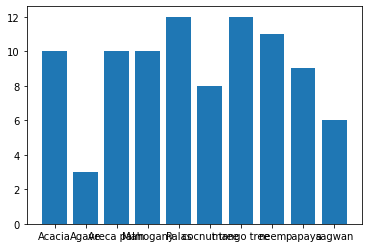

time: 194 ms (started: 2022-10-19 04:11:59 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
# Split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

time: 240 ms (started: 2022-10-19 04:12:12 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 23s (started: 2022-10-19 04:12:16 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([3, 7, 7, 0, 4, 6, 6, 2, 5, 4, 2, 0, 7, 7, 6, 0, 0, 2, 3, 9, 2, 3,
       4, 4, 7, 8, 3, 4])

time: 389 ms (started: 2022-10-19 04:15:14 +00:00)


In [ ]:
y_test

array([3, 7, 8, 0, 6, 6, 4, 2, 8, 4, 2, 0, 7, 4, 1, 8, 5, 6, 3, 9, 6, 3,
       4, 4, 7, 8, 3, 6])

time: 4.75 ms (started: 2022-10-19 04:15:20 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 752 µs (started: 2022-10-19 04:15:43 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.6071428571428571

time: 5.79 ms (started: 2022-10-19 04:15:56 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[2, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 3, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

time: 6.97 ms (started: 2022-10-19 04:16:33 +00:00)


In [1]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

NameError: ignored

In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 25.6 ms (started: 2022-10-19 04:26:30 +00:00)


Enter your URLhttps://www.nicepng.com/png/detail/775-7755249_coconut-computer-tree-file-free-transparent-image-hd.png
(1428, 820, 3)
 PREDICTED OUTPUT: cocnut tree


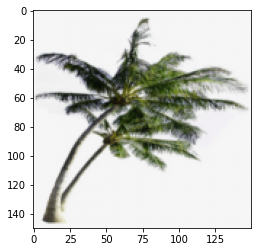

time: 8.68 s (started: 2022-10-19 04:31:07 +00:00)


In [ ]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')